In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

**Data Loading and Understanding**

In [ ]:
## Loading the dataset to pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/Dataset_colab/training_set/movies.csv")

In [ ]:
data.shape


(4803, 24)

In [ ]:
data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [ ]:
# Filter the required columns for recommendation
required_columns = ["genres","keywords","overview","title"]
data = data[required_columns]

In [ ]:
data.shape

(4803, 4)

In [ ]:
data.head()

,genres,keywords,overview,title
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A cryptic message from Bond’s past sends him o...,Spectre
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Following the death of District Attorney Harve...,The Dark Knight Rises
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"John Carter is a war-weary, former military ca...",John Carter


In [ ]:
# Check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4775 non-null   object
 1   keywords  4391 non-null   object
 2   overview  4800 non-null   object
 3   title     4803 non-null   object
dtypes: object(4)
memory usage: 150.2+ KB


In [ ]:
data=data.dropna().reset_index(drop=True)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4387 entries, 0 to 4386
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4387 non-null   object
 1   keywords  4387 non-null   object
 2   overview  4387 non-null   object
 3   title     4387 non-null   object
dtypes: object(4)
memory usage: 137.2+ KB


In [ ]:
data['combined'] = data['genres']+''+data['keywords']+''+data['overview']

In [ ]:
data.head()

,genres,keywords,overview,title,combined
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar,Action Adventure Fantasy Science Fictioncultur...
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,Adventure Fantasy Actionocean drug abuse exoti...
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A cryptic message from Bond’s past sends him o...,Spectre,Action Adventure Crimespy based on novel secre...
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Following the death of District Attorney Harve...,The Dark Knight Rises,Action Crime Drama Thrillerdc comics crime fig...
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"John Carter is a war-weary, former military ca...",John Carter,Action Adventure Science Fictionbased on novel...


In [ ]:
data.tail()

,genres,keywords,overview,title,combined
4382,Drama,gang audition police fake homeless actress,A young woman in L.A. is having a bad day: she...,Bang,Dramagang audition police fake homeless actres...
4383,Science Fiction Drama Thriller,distrust garage identity crisis time travel ti...,Friends/fledgling entrepreneurs invent a devic...,Primer,Science Fiction Drama Thrillerdistrust garage ...
4384,Action Crime Thriller,united states\u2013mexico barrier legs arms pa...,El Mariachi just wants to play his guitar and ...,El Mariachi,Action Crime Thrillerunited states\u2013mexico...
4385,Comedy Drama Romance TV Movie,date love at first sight narration investigati...,"""Signed, Sealed, Delivered"" introduces a dedic...","Signed, Sealed, Delivered",Comedy Drama Romance TV Moviedate love at firs...
4386,Documentary,obsession camcorder crush dream girl,Ever since the second grade when he first saw ...,My Date with Drew,Documentaryobsession camcorder crush dream gir...


In [ ]:
  data = data[['title','combined']]

In [ ]:
data.head()

,title,combined
0,Avatar,Action Adventure Fantasy Science Fictioncultur...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Actionocean drug abuse exoti...
2,Spectre,Action Adventure Crimespy based on novel secre...
3,The Dark Knight Rises,Action Crime Drama Thrillerdc comics crime fig...
4,John Carter,Action Adventure Science Fictionbased on novel...


In [ ]:
data.shape

(4387, 2)

In [ ]:
## Wordcloud for movie content
combined_text = " ".join(data['combined'])
wordcloud = WordCloud (width=800,height=400,background_color='white').generate(combined_text)


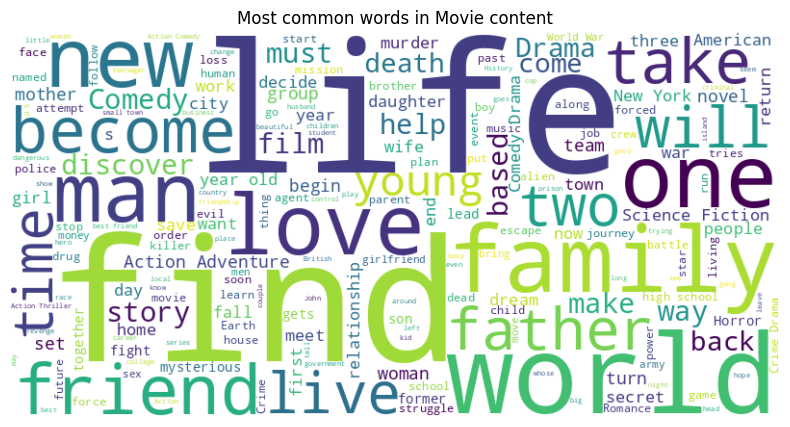

In [ ]:
# Wordcloud to visualize the most common words in the movie content
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most common words in Movie content")
plt.show()

In [ ]:
## Download NLTK Data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords = set(stopwords.words('english'))

## Common words in english

In [ ]:
# Preprocessing the text
def preprocess_text(text):

  #Remove special characters and numbers
  text = re.sub(r"[^a-zA-Z\s]", "", text)

  #convert to lowercase
  text = text.lower()

  #Tokenize and remove stopwords
  tokens = word_tokenize(text) # Chunk line of words into individual words
  tokens = [word for word in tokens if word not in stopwords]
  return " ".join(tokens)

In [ ]:
## Apply preprocessing to the movie content
data['cleaned_text'] = data['combined'].apply(preprocess_text)

In [ ]:
data.head()

,title,combined,cleaned_text
0,Avatar,Action Adventure Fantasy Science Fictioncultur...,action adventure fantasy science fictioncultur...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Actionocean drug abuse exoti...,adventure fantasy actionocean drug abuse exoti...
2,Spectre,Action Adventure Crimespy based on novel secre...,action adventure crimespy based novel secret a...
3,The Dark Knight Rises,Action Crime Drama Thrillerdc comics crime fig...,action crime drama thrillerdc comics crime fig...
4,John Carter,Action Adventure Science Fictionbased on novel...,action adventure science fictionbased novel ma...


**TF-IDF Vectorization**

Term Frequency measures how often a word appears in the document.

Inverse Document Frequency Reduces the weight of common words across multiple documents while increasing the weight of rare words.

In [ ]:
## Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Transorm text data into numerical vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text']) #Convert each words into vector for finding similar movies

**Cosine Similarity**

Cosine similarity is a measure of similarity between two vectors, determined by the cosine of the angle between them.

Each movie is compared with every other movie(vector) to find the similarity between them

In [ ]:
# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)

In [ ]:
print(len(cosine_sim[0]))
#First movie is compared with all other movies

4387


In [ ]:
# Recommendation Function
def recommend_movies(movie_name, cosine_sim=cosine_sim, df=data, top_n=5):
    # Find the index of the movie
    idx = df[df['title'].str.lower() == movie_name.lower()].index
    if len(idx) == 0:
        return "Movie not found in the dataset!"
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx])) # Attach index to the similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) # Reordering based on similarity score
    sim_scores = sim_scores[1:top_n+1] # Removing first element since its a same movie

    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return top n similar movies
    return df[['title']].iloc[movie_indices]

In [ ]:
data['title']

,title
0,Avatar
1,Pirates of the Caribbean: At World's End
2,Spectre
3,The Dark Knight Rises
4,John Carter
...,...
4382,Bang
4383,Primer
4384,El Mariachi
4385,"Signed, Sealed, Delivered"


In [ ]:
row_index = data[data['title'] == "Avengers: Age of Ultron"].index
print(row_index)

Index([7], dtype='int64')


In [ ]:
movie_name = data["title"][7]
print(movie_name)

Avengers: Age of Ultron


In [ ]:
# Recommendation Example
print(f"Recommended movies for '{movie_name}")
recommendations = recommend_movies(movie_name)
print(recommendations)

Recommended movies for 'Avengers: Age of Ultron
             title
78      Iron Man 2
1685      Kick-Ass
506          X-Men
16    The Avengers
68        Iron Man
